### Wieviel Punkte können in der Klausur bei entsprechendem Vorbereitungsaufwand in etwa erzielt werden  

In [1]:
# Vorbereitungsaufwand in Minuten
x = [10,20,45,30,60] 
# erzielte Punkte
y = [25,60,88,50,92] 

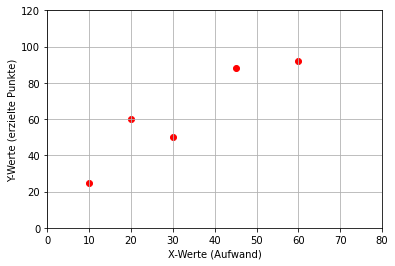

In [70]:
# Punkte anzeigen
import matplotlib.pyplot as plt

#Koordinatensystem
xmin=0
xmax=80
ymin=0
ymax=120
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("X-Werte (Aufwand)")
plt.ylabel("Y-Werte (erzielte Punkte)")

# Punkte xList, yList
plt.scatter(x, y, color="red")

plt.grid(True)
plt.show()

#### Einfache Lineare Regression

#### Formeln:

  - $m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$ 
    
  - $b = \bar{y} - m \cdot \bar{x}$
    
  - $R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y})^2}$
  
  - $y = m \cdot x + b$
  
#### Bedeutung:
  - $m :=$ Steigung der Geraden
  - $b :=$ y-Achsenabschnitt  
  - $R^2 :=$ Wie viel Streuung kann von dem Regressionsmodell erklärt werden

  
#### Symbole:
  - $\bar{x} :=$ Mittelwert von $x$
  - $\bar{y} :=$ Mittelwert von $y$
  - $\hat{y} :=$ Schätzung zum Wert x

#### Einfache Lineare Regression Programmieren

In [2]:
# Mittelwert (mean)
def mittelwert(x):
    sum = 0
    for xe in x:
        sum+=xe
    return sum / len(x)    

In [37]:
# Steigung m (slope)
def compute_m(xList, yList):
    xMittel=mittelwert(xList)
    yMittel=mittelwert(yList)
    frac1 = sum([(xList[i] - xMittel)*(yList[i] - yMittel) for i in range(len(xList))])
    frac2 = sum([(xList[i] - xMittel)**2 for i in range(len(xList))])
    m = frac1 / frac2
    return m

In [38]:
# b (intercept)
def compute_b(xList,yList,m):
    xMittel=mittelwert(xList)
    yMittel=mittelwert(yList)
    b = yMittel - m * xMittel
    return b

In [28]:
# y = f(x)
def regVal(xVal, m, b):
    return m*xVal+b

In [46]:
# y-Werte der Regressionsgerade
def regVals(xList, m, b):
    yVals = [regVal(xList[i],m,b) for i in range(len(xList))]
    return yVals

In [62]:
# Methode der kleinsten Quadrate kurz MKQ bzw. englisch method of least squares
def mkq(yList, regVals):
    mkq = sum([(yList[i] - regVals[i])**2 for i in range(len(yList))])
    return mkq

In [67]:
# R2
def r2(yList, regVals):
    yMittel=mittelwert(y)
    frac1 = sum([(yList[i] - regVals[i])**2 for i in range(len(yList))])
    frac2 = sum([(yList[i] - yMittel)**2 for i in range(len(yList))])
    r2Val = 1 - frac1 / frac2
    return r2Val

#### Lineare Regression berechnen

In [71]:
# xMittel, yMittel
xMittel = mittelwert(x)
yMittel = mittelwert(y)
print("Mittelwert x-Werte:",xMittel)
print("Mittelwert y-Werte:",yMittel)

Mittelwert x-Werte: 33.0
Mittelwert y-Werte: 63.0


In [40]:
# Funktionsgleichung der Regressionsgerade
m = compute_m(x,y)
b = compute_b(x,y,m)
print("y = ",m,"*x + ",b)

y =  1.2879746835443038 *x +  20.496835443037973


In [72]:
# compute regression values for all x_values
regression = regVals(x,m,b)
print("Regression Y-Werte:",list(zip(x,regression)))
# compute mkq
mkqVal = mkq(y,regression)
print("Methode der kleinsten Quadrate:",mkqVal)
# compute r2
r2Val = r2(y,regression)
print("R2:",r2Val)

Regression Y-Werte: [(10, 33.37658227848101), (20, 46.25632911392405), (45, 78.45569620253164), (30, 59.13607594936709), (60, 97.77531645569621)]
Methode der kleinsten Quadrate: 466.9715189873419
R2: 0.8487786531776742


### Daten darstellen

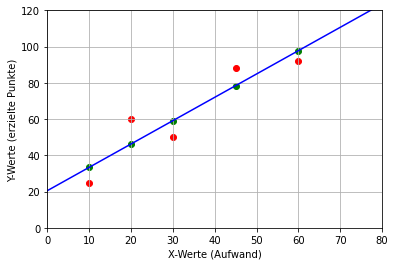

In [42]:
# plot regression line 
# scatter y-values an regression-values
import matplotlib.pyplot as plt

#Koordinatensystem
xmin=0
xmax=80
ymin=0
ymax=120
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel("X-Werte (Aufwand)")
plt.ylabel("Y-Werte (erzielte Punkte)")

# Punkte xList, yList
plt.scatter(x, y, color="red")

# Punkte Regressionsgerade
plt.scatter(x,regression,color="green")

# Linie Regressionsgerade
y1=regVal(xmin,m,b)
y2=regVal(xmax,m,b)
plt.plot([xmin,xmax],[y1,y2],color="blue")

plt.grid(True)
plt.show()

### Vorhersagen machen

In [59]:
# predict y_value for x_value=50
xVal = 37
yValPred = regVal(37,m,b)
print("Bei einem Vorbereitungsaufwand von",xVal,"Minuten wird eine Punktzahl von",round(yValPred,2),"erwartet.")
# predict y_values for x_values=50,70,90
xVals = [25,50,75]
yValsPred = regVals(xVals,m,b)
for i in range(len(xVals)):
    print("Bei einem Vorbereitungsaufwand von",xVals[i],"Minuten wird eine Punktzahl von",round(yValsPred[i],2),"erwartet.")



Bei einem Vorbereitungsaufwand von 37 Minuten wird eine Punktzahl von 68.15 erwartet.
Bei einem Vorbereitungsaufwand von 25 Minuten wird eine Punktzahl von 52.7 erwartet.
Bei einem Vorbereitungsaufwand von 50 Minuten wird eine Punktzahl von 84.9 erwartet.
Bei einem Vorbereitungsaufwand von 75 Minuten wird eine Punktzahl von 117.09 erwartet.
